# Data Quality Assessment

This notebook explores the routines available in `dqatool` for data quality assessment of the example Measurement Set provided.

In [1]:
from dqatool import rfi, plotting, imtools
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

I begin by loading the data from the example MS provided and plotting the amplitudes of the different correlation products against time and frequency. To avoid overwhelming the jupyter notebook by rendering millions of points, previously saved plots are displayed here. The plotting routines used can be found in `dqatool.plotting`.

In [2]:
ms_path = "/home/memer/projects/skao_sdp_engineer/assignment/dqatool/examples/pipeline_problem_data.ms"

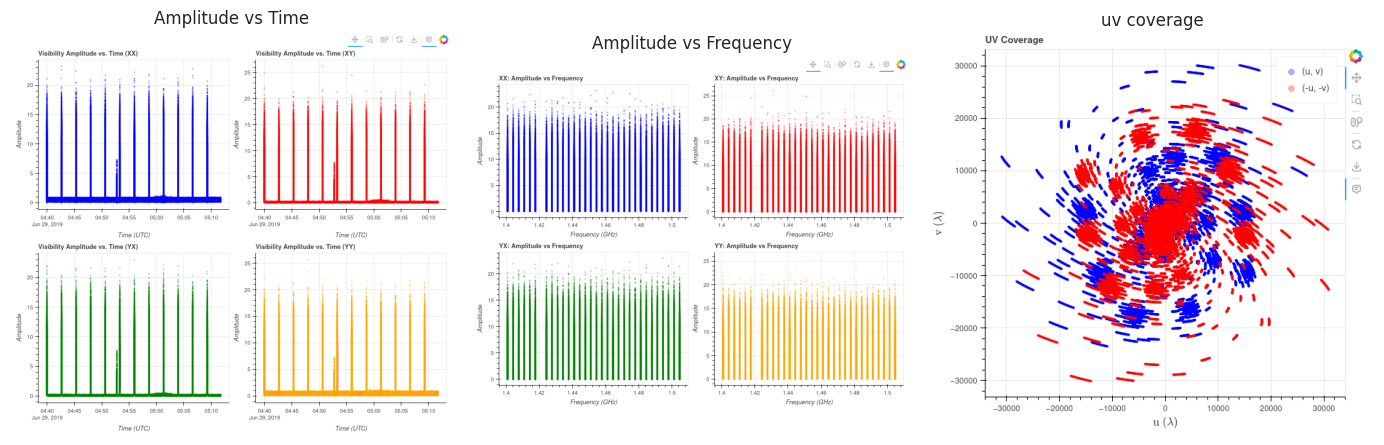

In [3]:
files = ['01-amp-vs-time.png', '02-amp-vs-freq.png', '03-uv-coverage.png']
labels = ['Amplitude vs Time', 'Amplitude vs Frequency', 'uv coverage']

# create a 1x2 grid of axes
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14, 18))

for ax, fname, lname in zip(axes, files, labels):
    img = mpimg.imread(fname)
    ax.imshow(img)
    ax.axis('off')          # hide axes ticks/labels
    ax.set_title(lname)     # optional: show filename as title

plt.tight_layout()
plt.show()

The time and frequency plots reveal pervasive, high‑amplitude RFI spikes across all channels throughout the observation.

I processed the data with CASA’s `tclean` task using parameter values guided by the SARAO Sensitivity Calculator and produced the image below. On a typical laptop it required about 35 minutes to compute.

The imaging used the `dqatool.imtools` submodule, a thin wrapper around established packages that currently interfaces with CASA’s `tclean`.

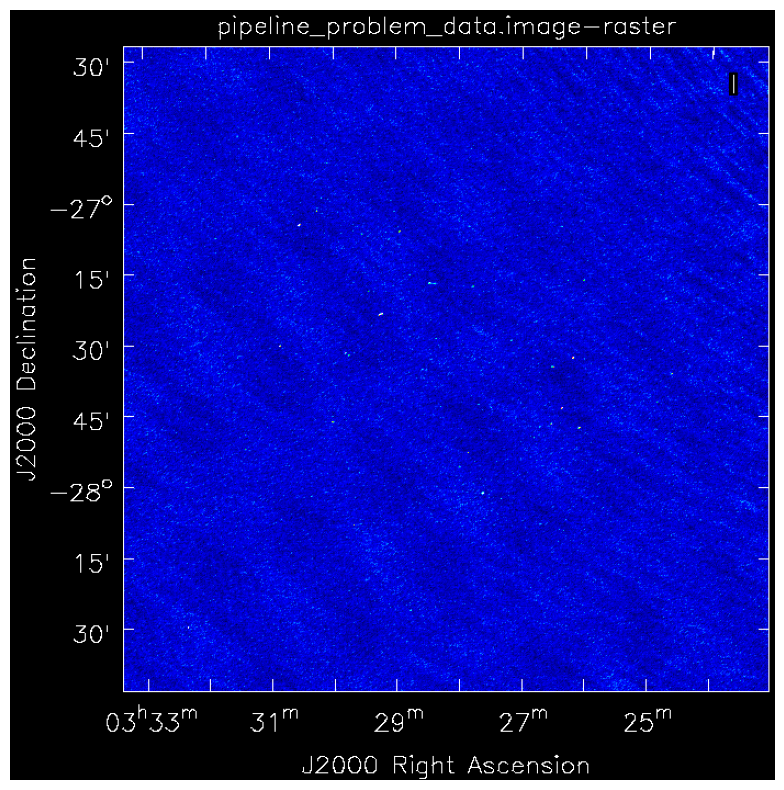

In [4]:
img = mpimg.imread('04-image-with-rfi.png')

plt.figure(figsize=(10,10))
plt.imshow(img)
plt.axis('off')    # hide axes
plt.show()

To detect and remove these spikes, I implemented a detection algorithm based on a rolling median and its Median Absolute Deviation—both robust estimators that are resistant to distortion by outliers. The routine can be run without modifying the MS to generate a CASA-compatible flag file or, optionally, replace the FLAG and FLAG_ROW columns in the MS.

The following plots (for two baselines) show which data points are marked as outliers by this algorithm for XX and YY correlations.

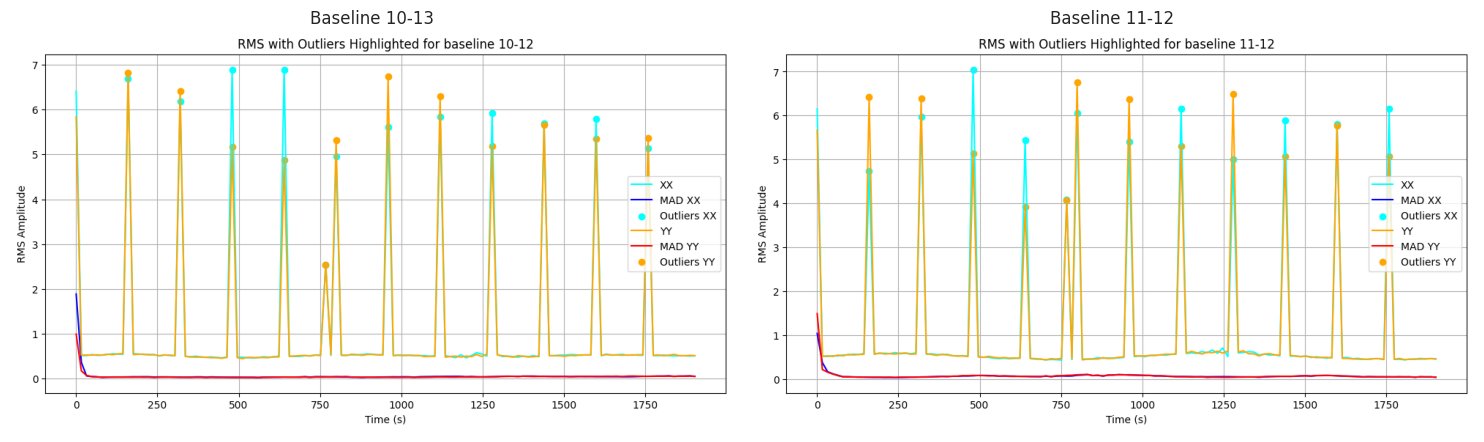

In [5]:
files = ['06-rfi-1013.png', '07-rfi-1112.png']
labels = ['Baseline 10-13', 'Baseline 11-12']

# create a 1x2 grid of axes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 30))

for ax, fname, lname in zip(axes, files, labels):
    img = mpimg.imread(fname)
    ax.imshow(img)
    ax.axis('off')          # hide axes ticks/labels
    ax.set_title(lname)     # optional: show filename as title

plt.tight_layout()
plt.show()

To detect and remove these spikes, I implemented a detection algorithm based on a rolling median and its Median Absolute Deviation—both robust estimators that are resistant to distortion by outliers. The routine can be run without modifying the MS to generate a CASA-compatible flag file or, optionally, replace the FLAG and FLAG_ROW columns in the MS.

For each baseline, the algorithm first forms the time-series of channel‑averaged amplitudes. Then, for each time it:

1. Takes a sliding window of neighboring times excluding itself.
2. Computes the median and the MAD of the amplitudes within that window.
3. Flags time if its amplitude lies more than multiplier*MAD away from the window’s median, where multiplier is chosen by the user.

Here, I run the RFI detection algorithm in the submodule `dqatool.rfi` without overwriting the flags for demonstration. This method generates a flag file called `rfi-flags.txt`.

In [6]:
rfi.detect_rfi_1d(ms_path=ms_path, overwriteflags=False)

Processing baselines: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1891/1891 [01:50<00:00, 17.17it/s]
2025-05-06 18:44:58,728 - INFO - dqatool.rfi - Flags not written to the MS. Use overwriteflags=True to write flags.
2025-05-06 18:44:59,038 - INFO - dqatool.rfi - RFI detection completed and flags written to rfi_flags.txt.


After excising the RFI, I re-imaged the data with the same parameters as before to directly assess the improvement. Below, we display the images side-by-side for comaprison.

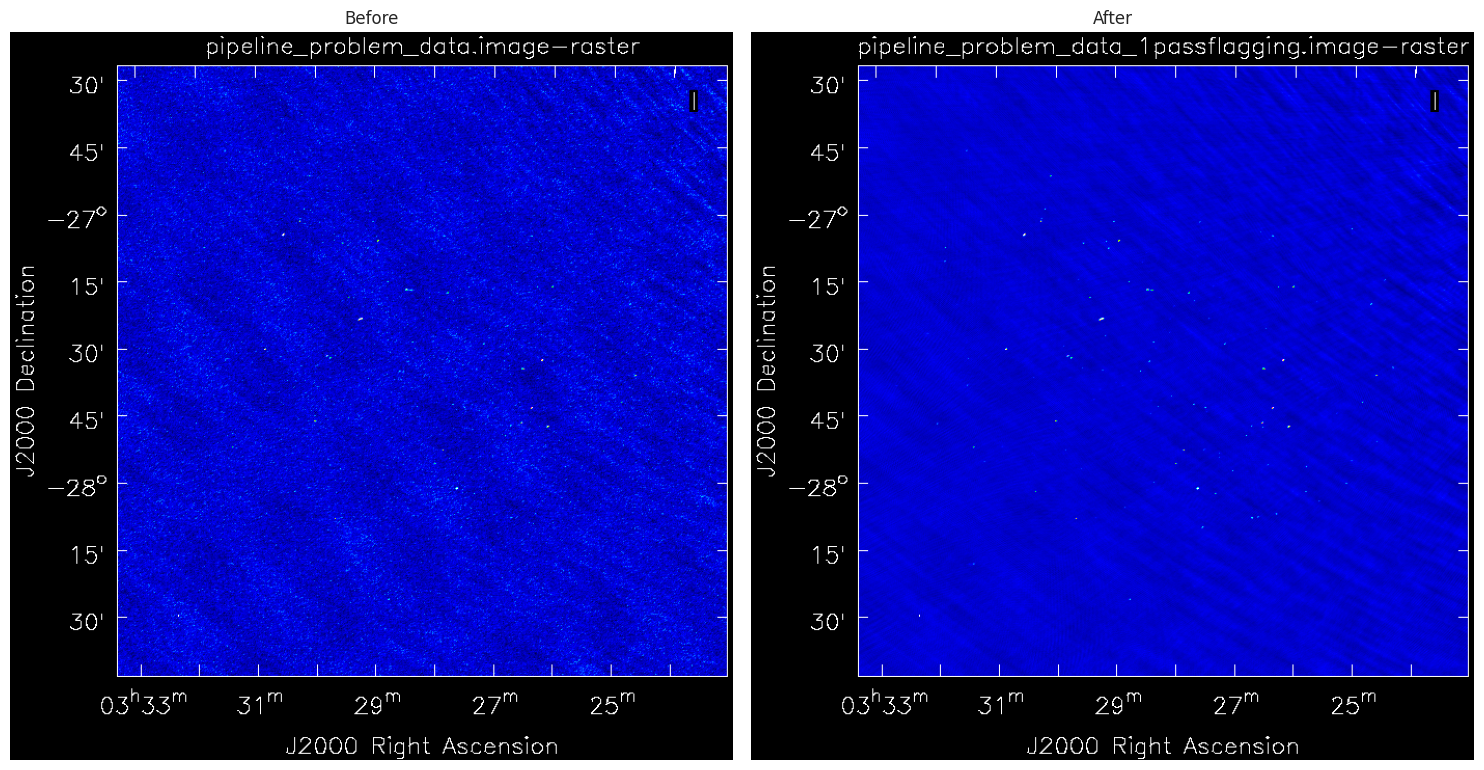

In [7]:
files = ['04-image-with-rfi.png', '05-image-with-rfi-flagged.png']
labels = ['Before', 'After']

# create a 1x2 grid of axes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 30))

for ax, fname, lname in zip(axes, files, labels):
    img = mpimg.imread(fname)
    ax.imshow(img)
    ax.axis('off')          # hide axes ticks/labels
    ax.set_title(lname)     # optional: show filename as title

plt.tight_layout()
plt.show()